# rf315_projectpdf
Multidimensional models: marginizalization of multi-dimensional pdfs through integration




**Author:** Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, May 13, 2024 at 11:35 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataHist.h"
#include "RooGaussian.h"
#include "RooProdPdf.h"
#include "RooPolyVar.h"
#include "TH1.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "RooNumIntConfig.h"
using namespace RooFit;

Create pdf m(x,y) = gx(x|y)*g(y)
--------------------------------------------------------------

Increase default precision of numeric integration
as this exercise has high sensitivity to numeric integration precision

In [2]:
RooAbsPdf::defaultIntegratorConfig()->setEpsRel(1e-8);
RooAbsPdf::defaultIntegratorConfig()->setEpsAbs(1e-8);

Create observables

In [3]:
RooRealVar x("x", "x", -5, 5);
RooRealVar y("y", "y", -2, 2);

Create function f(y) = a0 + a1*y

In [4]:
RooRealVar a0("a0", "a0", 0);
RooRealVar a1("a1", "a1", -1.5, -3, 1);
RooPolyVar fy("fy", "fy", y, RooArgSet(a0, a1));

Create gaussx(x,f(y),sx)

In [5]:
RooRealVar sigmax("sigmax", "width of gaussian", 0.5);
RooGaussian gaussx("gaussx", "Gaussian in x with shifting mean in y", x, fy, sigmax);

[#0] WARNING:InputArguments -- The parameter 'sigmax' with range [-inf, inf] of the RooGaussian 'gaussx' exceeds the safe range of (0, inf). Advise to limit its range.


Create gaussy(y,0,2)

In [6]:
RooGaussian gaussy("gaussy", "Gaussian in y", y, 0.0, 2.0);

Create gaussx(x,sx|y) * gaussy(y)

In [7]:
RooProdPdf model("model", "gaussx(x|y)*gaussy(y)", gaussy, Conditional(gaussx, x));

Marginalize m(x,y) to m(x)
----------------------------------------------------

modelx(x) = Int model(x,y) dy

In [8]:
RooAbsPdf *modelx = model.createProjection(y);

Use marginalized p.d.f. as regular 1-D p.d.f.
------------------------------------------------------------------------------------------

Sample 1000 events from modelx

In [9]:
std::unique_ptr<RooAbsData> data{modelx->generateBinned(x, 1000)};

[#1] INFO:NumericIntegration -- RooRealIntegral::init([gaussy_NORM[y]_X_gaussx_NORM[x]]_Int[y]) using numeric integrator RooIntegrator1D to calculate Int(y)


input_line_58:2:2: warning: 'data' shadows a declaration with the same name in the 'std' namespace; use '::data' to reference this declaration
 std::unique_ptr<RooAbsData> data{modelx->generateBinned(x, 1000)};
 ^


Fit modelx to toy data

In [10]:
modelx->fitTo(*data, Verbose(), PrintLevel(-1));

input_line_59:2:17: error: reference to 'data' is ambiguous
 modelx->fitTo(*data, Verbose(), PrintLevel(-1));
                ^
input_line_58:2:30: note: candidate found by name lookup is 'data'
 std::unique_ptr<RooAbsData> data{modelx->generateBinned(x, 1000)};
                             ^
/usr/include/c++/9/bits/range_access.h:318:5: note: candidate found by name lookup is 'std::data'
    data(initializer_list<_Tp> __il) noexcept
    ^
/usr/include/c++/9/bits/range_access.h:289:5: note: candidate found by name lookup is 'std::data'
    data(_Container& __cont) noexcept(noexcept(__cont.data()))
    ^
/usr/include/c++/9/bits/range_access.h:299:5: note: candidate found by name lookup is 'std::data'
    data(const _Container& __cont) noexcept(noexcept(__cont.data()))
    ^
/usr/include/c++/9/bits/range_access.h:309:5: note: candidate found by name lookup is 'std::data'
    data(_Tp (&__array)[_Nm]) noexcept
    ^


Plot modelx over data

In [11]:
RooPlot *frame = x.frame(40);
data->plotOn(frame);
modelx->plotOn(frame);

input_line_60:3:1: error: reference to 'data' is ambiguous
data->plotOn(frame);
^
input_line_58:2:30: note: candidate found by name lookup is 'data'
 std::unique_ptr<RooAbsData> data{modelx->generateBinned(x, 1000)};
                             ^
/usr/include/c++/9/bits/range_access.h:318:5: note: candidate found by name lookup is 'std::data'
    data(initializer_list<_Tp> __il) noexcept
    ^
/usr/include/c++/9/bits/range_access.h:289:5: note: candidate found by name lookup is 'std::data'
    data(_Container& __cont) noexcept(noexcept(__cont.data()))
    ^
/usr/include/c++/9/bits/range_access.h:299:5: note: candidate found by name lookup is 'std::data'
    data(const _Container& __cont) noexcept(noexcept(__cont.data()))
    ^
/usr/include/c++/9/bits/range_access.h:309:5: note: candidate found by name lookup is 'std::data'
    data(_Tp (&__array)[_Nm]) noexcept
    ^


Make 2D histogram of model(x,y)

In [12]:
TH1 *hh = model.createHistogram("x,y");
hh->SetLineColor(kBlue);

TCanvas *c = new TCanvas("rf315_projectpdf", "rf315_projectpdf", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.4);
frame->Draw();
c->cd(2);
gPad->SetLeftMargin(0.20);
hh->GetZaxis()->SetTitleOffset(2.5);
hh->Draw("surf");

input_line_62:2:3: error: use of undeclared identifier 'frame'
 (frame->GetYaxis()->SetTitleOffset(1.3999999999999999))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (frame->GetYaxis()->SetTitleOffset(1.3999999999999999))
Execution of your code was aborted.


Draw all canvases 

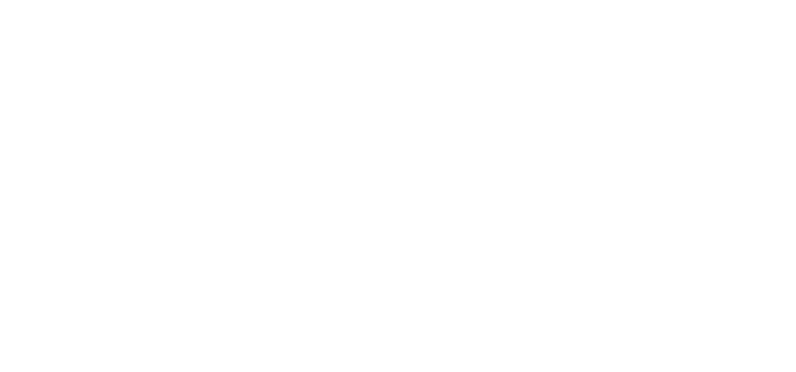

In [13]:
gROOT->GetListOfCanvases()->Draw()